# Credit Risk (Data Mining)

# Importing required packages

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from dmba import regressionSummary, exhaustive_search
from dmba import classificationSummary, gainsChart, liftChart
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from mord import LogisticIT
from math import sqrt


import statsmodels.api as sm
import statsmodels.formula.api as sm


import matplotlib.pylab as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


# Data exploring, cleaning and preprocessing

In [2]:
#Creating dataframe from the given data set
credit_df = pd.read_csv("GermanCredit.csv")

In [3]:
#Determine the dimensions of the data frame
credit_df.shape

(1000, 32)

In [4]:
#Display the first 10 column of the dataframe
credit_df.head(10)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0
5,6,3,36,2,0,0,0,0,1,0,...,35,0,0,0,1,1,2,1,0,1
6,7,3,24,2,0,0,1,0,0,0,...,53,0,0,1,1,2,1,0,0,1
7,8,1,36,2,0,1,0,0,0,0,...,35,0,1,0,1,3,1,1,0,1
8,9,3,12,2,0,0,0,1,0,0,...,61,0,0,1,1,1,1,0,0,1
9,10,1,30,4,1,0,0,0,0,0,...,28,0,0,1,2,3,1,0,0,0


In [5]:
#Set the column OBS# to index
credit_df.set_index('OBS#', inplace=True)
credit_df.head(10)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
OBS#,,,,,,,,,,,,,,,,,,,,,
1,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
2,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
3,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
4,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
5,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0
6,3,36,2,0,0,0,0,1,0,9055,...,35,0,0,0,1,1,2,1,0,1
7,3,24,2,0,0,1,0,0,0,2835,...,53,0,0,1,1,2,1,0,0,1
8,1,36,2,0,1,0,0,0,0,6948,...,35,0,1,0,1,3,1,1,0,1
9,3,12,2,0,0,0,1,0,0,3059,...,61,0,0,1,1,1,1,0,0,1


In [6]:
#Identify the column variable types
credit_df.dtypes

CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
RESPONSE            int64
dtype: object

In [7]:
#Display the column names of the data frame after converting into binary data type
credit_df.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

# Develop k-NN model and make predictions

In [8]:
# Identify predictors and outcome of the k-NN model.
predictors = ['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN']
outcome = 'RESPONSE'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4)
X = credit_df[predictors]
y = credit_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [9]:
# Develop standardized (normalized) data for the training and 
# validation partitions for k-NN regressor model.

# Create scaler object using StandardScaler() function. 
scaler = StandardScaler()

# Transform training and validation predictors into scaled 
# (normalized) values (train_X_scaled), and create a data 
# frame based on the transformed values. 
train_X_scaled = scaler.fit_transform(train_X)

train_X_s = pd.DataFrame(train_X_scaled, 
                columns=['zCHK_ACCT', 'zDURATION', 'zHISTORY', 'zNEW_CAR', 'zUSED_CAR',
                           'zFURNITURE', 'zRADIO/TV', 'zEDUCATION', 'zRETRAINING', 'zAMOUNT',
                           'zSAV_ACCT', 'zEMPLOYMENT', 'zINSTALL_RATE', 'zMALE_DIV', 'zMALE_SINGLE',
                           'zMALE_MAR_or_WID', 'zCO-APPLICANT', 'zGUARANTOR', 'zPRESENT_RESIDENT',
                           'zREAL_ESTATE', 'zPROP_UNKN_NONE', 'zAGE', 'zOTHER_INSTALL', 'zRENT',
                           'zOWN_RES', 'zNUM_CREDITS', 'zJOB', 'zNUM_DEPENDENTS', 'zTELEPHONE',
                           'zFOREIGN'])

valid_X_scaled = scaler.fit_transform(valid_X)
valid_X_s = pd.DataFrame(valid_X_scaled,
                columns=['zCHK_ACCT', 'zDURATION', 'zHISTORY', 'zNEW_CAR', 'zUSED_CAR',
                           'zFURNITURE', 'zRADIO/TV', 'zEDUCATION', 'zRETRAINING', 'zAMOUNT',
                           'zSAV_ACCT', 'zEMPLOYMENT', 'zINSTALL_RATE', 'zMALE_DIV', 'zMALE_SINGLE',
                           'zMALE_MAR_or_WID', 'zCO-APPLICANT', 'zGUARANTOR', 'zPRESENT_RESIDENT',
                           'zREAL_ESTATE', 'zPROP_UNKN_NONE', 'zAGE', 'zOTHER_INSTALL', 'zRENT',
                           'zOWN_RES', 'zNUM_CREDITS', 'zJOB', 'zNUM_DEPENDENTS', 'zTELEPHONE',
                           'zFOREIGN'])

#Display training partition shape (number of records, number of columns)
print('Number of Records and Columns in Training and Validation Partitions')
print(train_X_s.shape, valid_X_s.shape)

# Display normalized training partition records. 
print()
print('Training Partition Records')
print(train_X_s)

Number of Records and Columns in Training and Validation Partitions
(600, 30) (400, 30)

Training Partition Records
     zCHK_ACCT  zDURATION  zHISTORY  zNEW_CAR  zUSED_CAR  zFURNITURE  \
0     1.155652  -0.241979  1.399673 -0.574784  -0.342518   -0.492175   
1     1.155652  -0.830463  1.399673  1.739783  -0.342518   -0.492175   
2    -1.238103   0.262436 -0.479083 -0.574784   2.919556   -0.492175   
3     1.155652   0.010228 -0.479083 -0.574784   2.919556   -0.492175   
4    -0.440185  -0.241979 -0.479083  1.739783  -0.342518   -0.492175   
..         ...        ...       ...       ...        ...         ...   
595   1.155652  -0.914533 -0.479083 -0.574784   2.919556   -0.492175   
596  -1.238103  -1.082671  1.399673 -0.574784  -0.342518   -0.492175   
597   1.155652  -0.494187  0.460295 -0.574784   2.919556   -0.492175   
598  -1.238103   0.262436 -0.479083 -0.574784  -0.342518   -0.492175   
599   0.357733  -0.241979 -0.479083 -0.574784  -0.342518   -0.492175   

     zRADIO/TV  zED

In [10]:
# Develop k-NN regressor model using KNeighborsRegressor()
# function and number of nearest neighbors, k = 3.
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(train_X_s, train_y)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# Use predict() function to make predictions for
# training set.
knn_train_pred = knn.predict(train_X_s)
knn_valid_pred = knn.predict(valid_X_s)

# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set')
regressionSummary(train_y, knn_train_pred)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
regressionSummary(valid_y, knn_valid_pred)

Accuracy Measures for Training Set

Regression statistics

               Mean Error (ME) : -0.0078
Root Mean Squared Error (RMSE) : 0.3377
     Mean Absolute Error (MAE) : 0.2256

Accuracy Measures for Validation Set

Regression statistics

               Mean Error (ME) : -0.0058
Root Mean Squared Error (RMSE) : 0.4525
     Mean Absolute Error (MAE) : 0.3192


In [12]:
# Identify best k value for number of nearest neighbors using 
# validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 
results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1          0.5750
1    2          0.5150
2    3          0.6175
3    4          0.5875
4    5          0.6725
5    6          0.6325
6    7          0.6750
7    8          0.6575
8    9          0.6775
9   10          0.6725
10  11          0.6950
11  12          0.6850
12  13          0.7050
13  14          0.6975


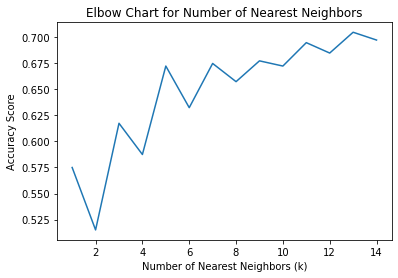

In [13]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

# Develop classification tree for the data frame


Classification Tree after First Split


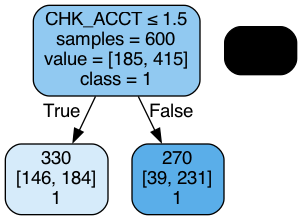

In [14]:
# Identify predictors and outcome of the  model.
# Apply DecisionTreeClassifier() function to create classification tree.
# Use max_depth to control tree size: 
        # for the first split: max_depth=1;
        # for the two splits:  max_depth=2;
predictors = ['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN']
outcome = 'RESPONSE'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4)
X = credit_df[predictors]
y = credit_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Apply DecisionTreeClassifier() function to create classification tree.
# Create classification tree for the first split (max_depth=1)
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(train_X,train_y)


# Use plotDecisionTree() function to visualize the classfication tree.
print()
print('Classification Tree after First Split')

plotDecisionTree(classTree, feature_names=predictors, class_names=classTree.classes_)


Classification Tree after First Split


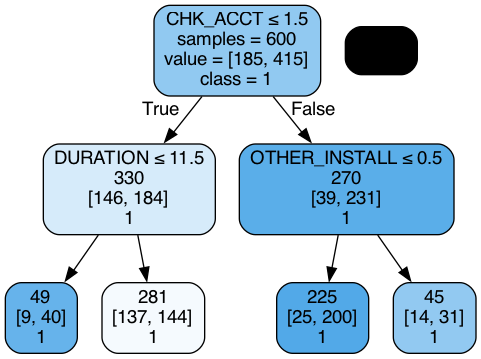

In [15]:
# Create classification tree for the first split (max_depth=2)
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree.fit(train_X,train_y)


# Use plotDecisionTree() function to visualize the classfication tree.
print()
print('Classification Tree after First Split')

plotDecisionTree(classTree, feature_names=predictors, class_names=classTree.classes_)


Full Classification Tree after all splits


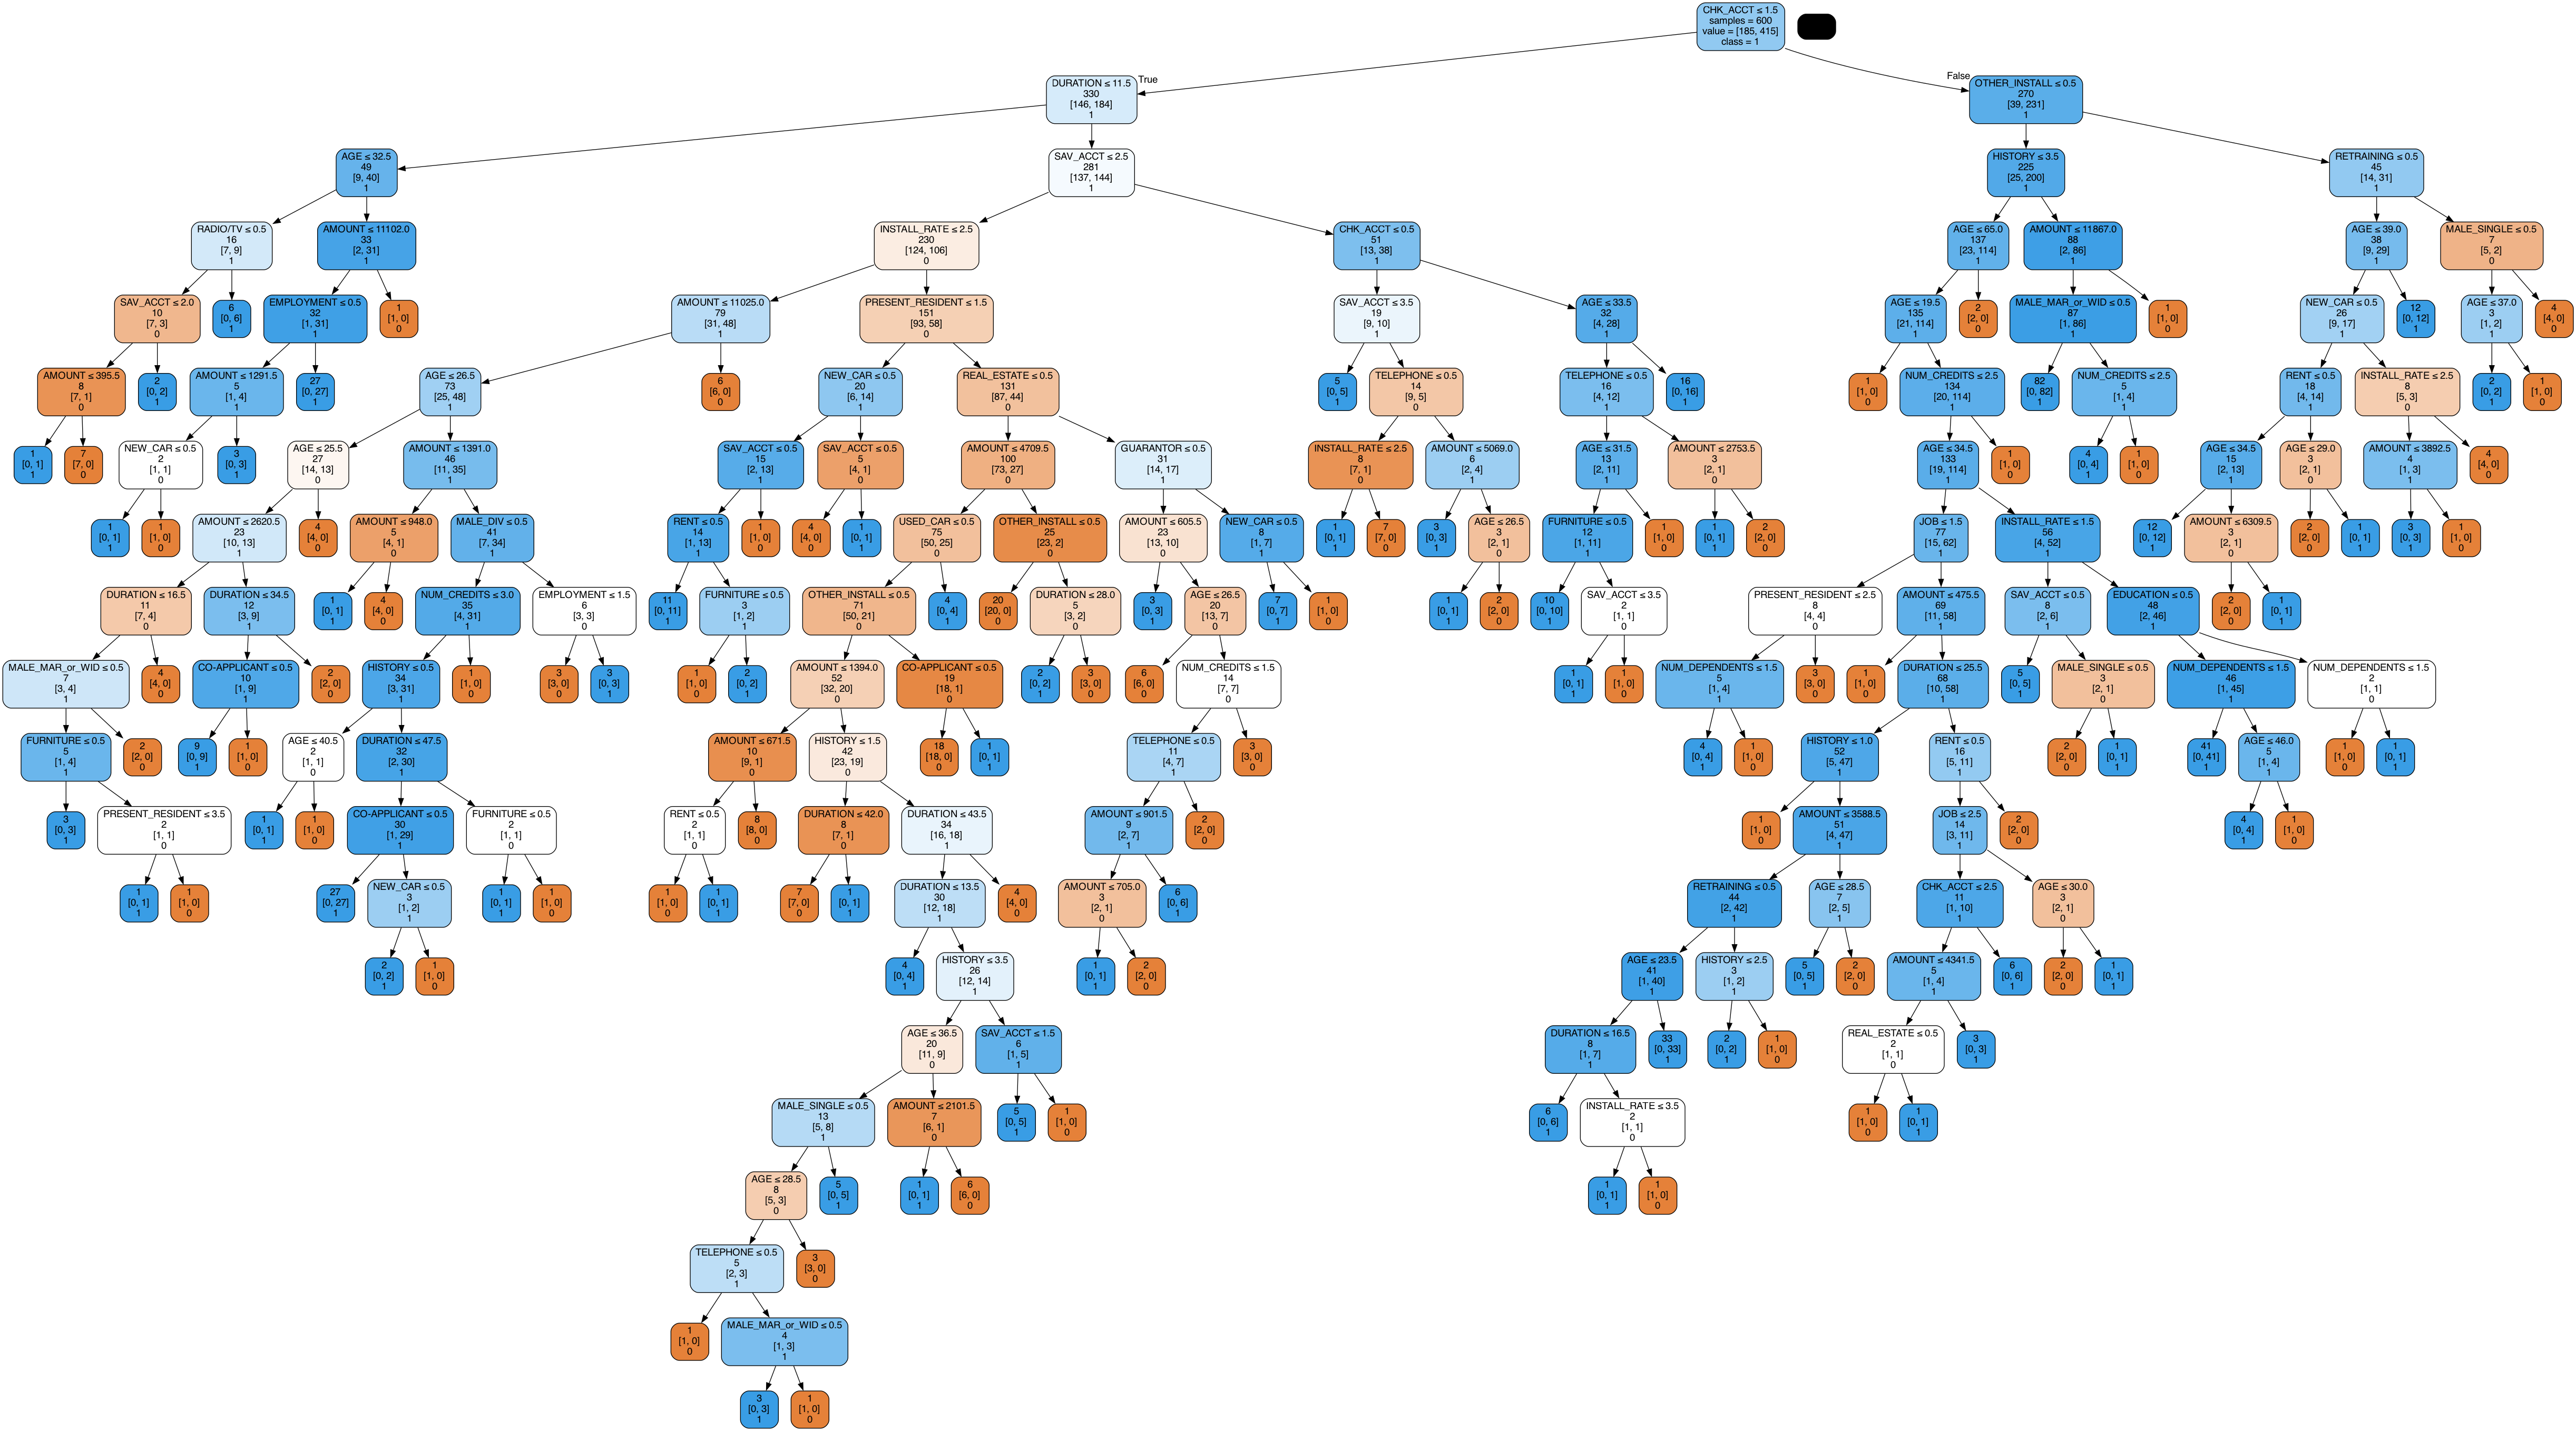

In [16]:
# Create classification tree for the fully grown tree
# Don't use max_depth for growing full tree. 
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(train_X,train_y)


# Use plotDecisionTree() function to visualize the full classfication tree.
print()
print('Full Classification Tree after all splits')

plotDecisionTree(classTree, feature_names=predictors, class_names=classTree.classes_)

# Apply confusion matrix and make classifications

In [17]:
# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, classTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, classTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.0000
     Mean Absolute Error (MAE) : 0.0000

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.5701
     Mean Absolute Error (MAE) : 0.3250


In [18]:
# Confusion matrices for the classification trees. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, classTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, classTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 185   0
     1   0 415

Validation Partition
Confusion Matrix (Accuracy 0.6750)

       Prediction
Actual   0   1
     0  50  65
     1  65 220


# Apply grid search algorithm for the data set

In [19]:
# Improved grid search parameters using adapting grid based 
param_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0,0.0005,0.001], 
    'min_samples_split': list(range(5, 30)),
}

# we can use GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() using parameters. 
#cv=5 is that 5-fold cross-validation is used in this case,
#n_jobs=-1 means that the availalbe computer memory (CPU) used to make calculations faster.
# AGridSearchCV() fucntion for various combinations of DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'score:{gridSearch.best_score_:.4f}')
print('Improved_parameters: ', gridSearch.best_params_)


score:0.7033
Improved_parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 28}


Best Classification Tree for Grid Search


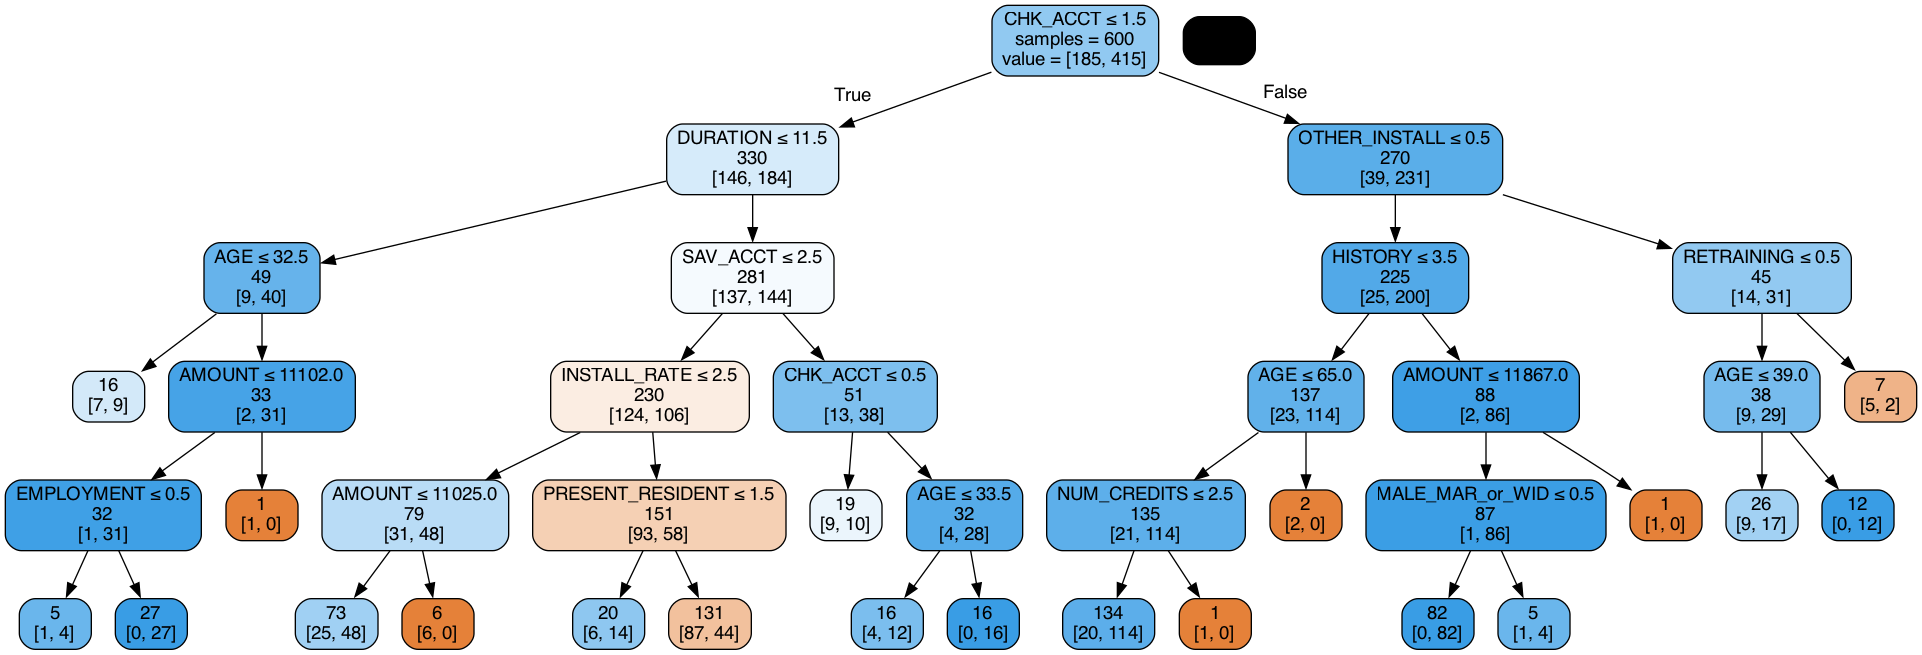

In [20]:
# classification tree based on the improved parameters.
best_Class_Tree = gridSearch.best_estimator_

#  classification tree based on improved parameters
print('Best Classification Tree for Grid Search')
plotDecisionTree(best_Class_Tree, feature_names=train_X.columns)

In [21]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, best_Class_Tree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, best_Class_Tree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

               Mean Error (ME) : -0.0600
Root Mean Squared Error (RMSE) : 0.4619
     Mean Absolute Error (MAE) : 0.2133

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

               Mean Error (ME) : -0.0725
Root Mean Squared Error (RMSE) : 0.5315
     Mean Absolute Error (MAE) : 0.2825


In [22]:
# Confusion matrices for grid search classification tree. 

# Iconfusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, best_Class_Tree.predict(train_X))

#  confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, best_Class_Tree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.7867)

       Prediction
Actual   0   1
     0 103  82
     1  46 369

Validation Partition
Confusion Matrix (Accuracy 0.7175)

       Prediction
Actual   0   1
     0  44  71
     1  42 243


# Develop and run logistic regression

In [23]:
predictors = ['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR',
       'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT',
       'SAV_ACCT', 'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN']
outcome = 'RESPONSE'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4)
X = credit_df[predictors]
y = credit_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit single predictor logistic
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Display intercept and coefficients of the logistic
# model.
print('Parameters Logistic Regression Model')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print(pd.DataFrame({'Coefficient:': np.round(log_reg.coef_[0], decimals=3)}, 
                   index=X.columns).transpose())

Parameters Logistic Regression Model
Intercept: 0.289
              CHK_ACCT  DURATION  HISTORY  NEW_CAR  USED_CAR  FURNITURE  \
Coefficient:     0.458    -0.019    0.547   -0.824     1.113      0.204   

              RADIO/TV  EDUCATION  RETRAINING  AMOUNT  ...  PROP_UNKN_NONE  \
Coefficient:     0.324      -0.36      -0.412    -0.0  ...          -0.096   

                AGE  OTHER_INSTALL   RENT  OWN_RES  NUM_CREDITS    JOB  \
Coefficient:  0.025         -0.551 -0.389    0.086       -0.342  0.007   

              NUM_DEPENDENTS  TELEPHONE  FOREIGN  
Coefficient:          -0.059      0.427    0.599  

[1 rows x 30 columns]


In [24]:
# Make predictions for validation set using logistic model. 

# Predict logistic model's results (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)


# Predict logistic model's probabilities p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to display simple logistic regression
# resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                        'Classification': log_pred,     
                        'p(0)': [p[0] for p in log_prob],
                        'p(1)': [p[1] for p in log_prob],
                        })
print('Classification for Validation Partition')
print(log_result.head(50))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
OBS#                                        
508        0               1  0.4471  0.5529
819        1               0  0.9543  0.0457
453        1               1  0.2845  0.7155
369        0               0  0.5329  0.4671
243        0               0  0.8081  0.1919
930        1               0  0.5138  0.4862
263        1               1  0.4576  0.5424
811        1               1  0.2190  0.7810
319        1               1  0.1188  0.8812
50         1               1  0.2243  0.7757
447        0               0  0.8073  0.1927
143        1               1  0.4572  0.5428
969        1               1  0.0990  0.9010
346        1               1  0.0651  0.9349
972        1               1  0.2956  0.7044
134        1               1  0.3460  0.6540
105        1               1  0.0163  0.9837
7          1               1  0.0615  0.9385
601        1               1  0.0438  0.9562
497        0   

In [25]:
# Confusion matrices for logistic model. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.7967)

       Prediction
Actual   0   1
     0 105  80
     1  42 373

Validation Partition
Confusion Matrix (Accuracy 0.7550)

       Prediction
Actual   0   1
     0  53  62
     1  36 249


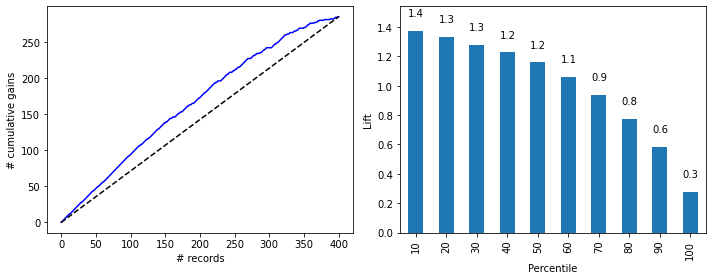

In [26]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
# In the Gains chart, the 'lift' over the base curve 
# indicates for a given number of cases (on x-axis), 
# the additional responders that you can identify 
# by using the logistic regression model.
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 7.8 times as many 1's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()